In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Define a function to create and fine-tune the model

In [ ]:
!unzip normal.zip


In [19]:


# Define paths
dataset_dir = 'content'
train_dir = 'content'
val_dir = 'content'
test_dir = 'content'

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(train_dir, 'masks'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'masks'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'masks'), exist_ok=True)

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

images = [f for f in os.listdir(dataset_dir) if not f.endswith('_mask.png')]
masks = [f for f in os.listdir(dataset_dir) if f.endswith('_mask.png')]
print(images)
print(masks)

train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    './normal/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    './normal/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
   './normal/',
   target_size=(224, 224),
   batch_size=32,
   class_mode='binary'
)


['images', 'masks', 'Breast cancer dataset sample.png']
[]
Found 16 images belonging to 3 classes.
Found 16 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, test_generator):
    test_generator.reset()
    predictions = model.predict(test_generator, verbose=1)
    y_pred = [1 if pred > 0.5 else 0 for pred in predictions]
    y_true = test_generator.classes
    print(classification_report(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

vgg_metrics = evaluate_model(vgg_model, test_generator)
resnet_metrics = evaluate_model(resnet_model, test_generator)
inception_metrics = evaluate_model(inception_model, test_generator)


Epoch 1/10
1/1 [==============================] - 62s 62s/step - loss: 0.4866 - accuracy: 0.3125 - val_loss: -74.9812 - val_accuracy: 0.3125
Epoch 2/10
1/1 [==============================] - 40s 40s/step - loss: -74.9812 - accuracy: 0.3125 - val_loss: -46749.6562 - val_accuracy: 0.3125
Epoch 3/10
1/1 [==============================] - 39s 39s/step - loss: -46749.6562 - accuracy: 0.3125 - val_loss: -1604348.1250 - val_accuracy: 0.3125
Epoch 4/10
1/1 [==============================] - 41s 41s/step - loss: -1604348.1250 - accuracy: 0.3125 - val_loss: -23405020.0000 - val_accuracy: 0.3125
Epoch 5/10
1/1 [==============================] - 40s 40s/step - loss: -23405020.0000 - accuracy: 0.3125 - val_loss: -217047456.0000 - val_accuracy: 0.3125
Epoch 6/10
1/1 [==============================] - 40s 40s/step - loss: -217047440.0000 - accuracy: 0.3125 - val_loss: -1511654528.0000 - val_accuracy: 0.3125
Epoch 7/10
1/1 [==============================] - 40s 40s/step - loss: -1511654656.0000 - accu

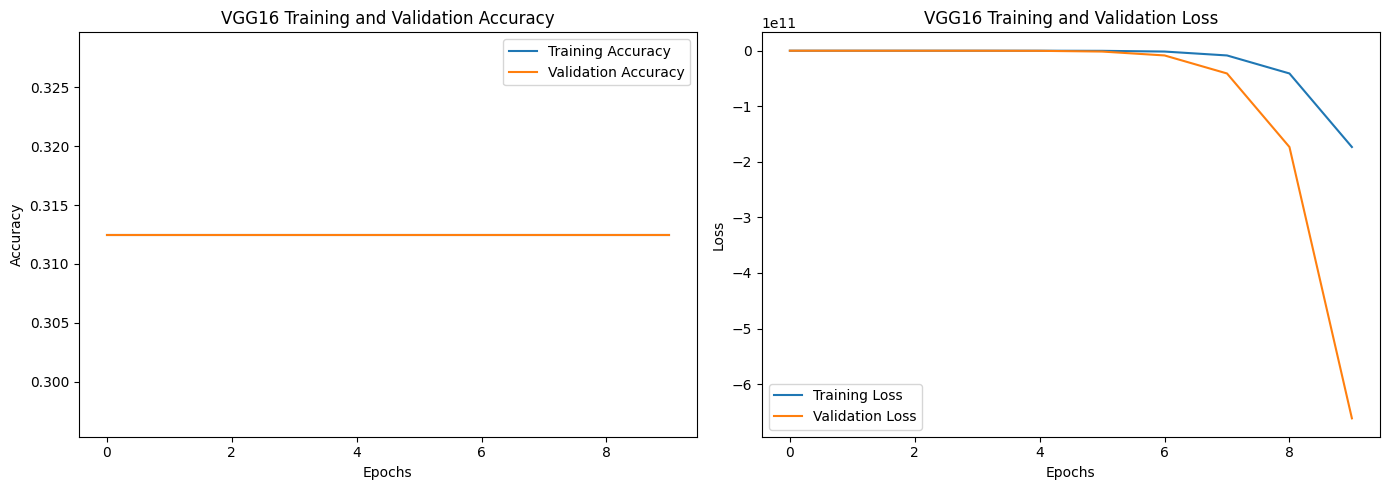

Epoch 1/10
1/1 [==============================] - 40s 40s/step - loss: 0.7830 - accuracy: 0.3125 - val_loss: -7.9707 - val_accuracy: 0.3125
Epoch 2/10
1/1 [==============================] - 14s 14s/step - loss: -15.5318 - accuracy: 0.3125 - val_loss: -6.9275 - val_accuracy: 0.3125
Epoch 3/10
1/1 [==============================] - 13s 13s/step - loss: -43.7975 - accuracy: 0.3125 - val_loss: -281.9429 - val_accuracy: 0.3125
Epoch 4/10
1/1 [==============================] - 14s 14s/step - loss: -82.9666 - accuracy: 0.3125 - val_loss: -2491.7124 - val_accuracy: 0.3125
Epoch 5/10
1/1 [==============================] - 14s 14s/step - loss: -136.0717 - accuracy: 0.3125 - val_loss: -5341.8330 - val_accuracy: 0.3125
Epoch 6/10
1/1 [==============================] - 15s 15s/step - loss: -201.3315 - accuracy: 0.3125 - val_loss: -15454.1797 - val_accuracy: 0.3125
Epoch 7/10
1/1 [==============================] - 16s 16s/step - loss: -275.4108 - accuracy: 0.3125 - val_loss: -5163.0840 - val_accurac

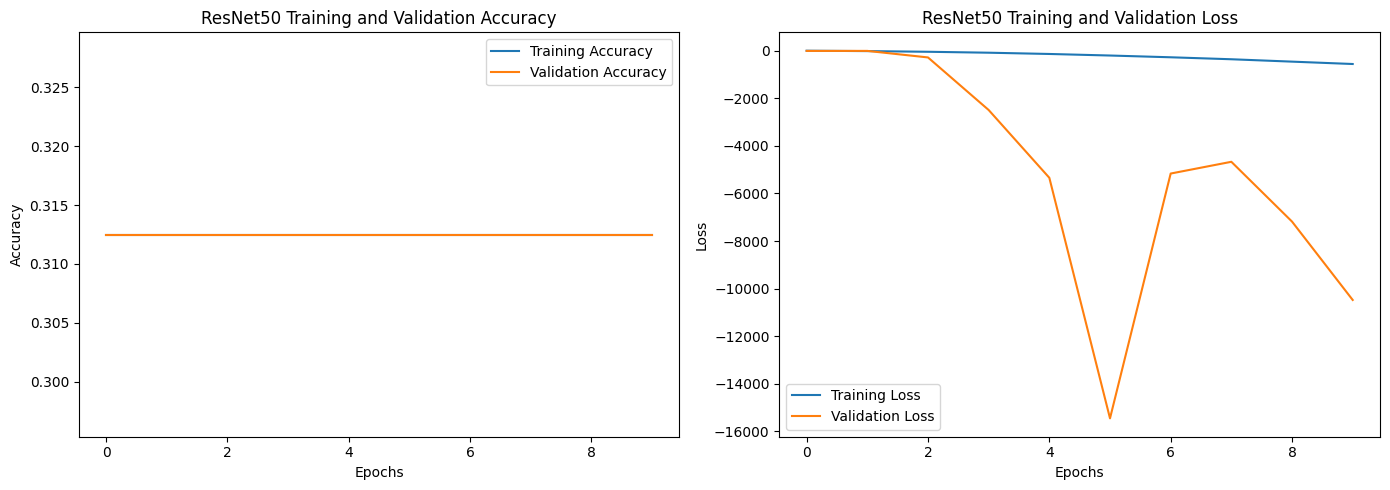

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/10
1/1 [==============================] - 35s 35s/step - loss: -0.2319 - accuracy: 0.3125 - val_loss: -14.5281 - val_accuracy: 0.3125
Epoch 2/10
1/1 [==============================] - 9s 9s/step - loss: -11.3980 - accuracy: 0.3125 - val_loss: -48.0185 - val_accuracy: 0.3125
Epoch 3/10
1/1 [==============================] - 10s 10s/step - loss: -25.6878 - accuracy: 0.3125 - val_loss: -91.4343 - val_accuracy: 0.3125
Epoch 4/10
1/1 [==============================] - 10s 10s/step - loss: -41.0349 - accuracy: 0.3125 - val_loss: -145.4404 - val_accuracy: 0.3125
Epoch 5/10
1/1 [==============================] - 9s 9s/step - loss: -58.2816 - accuracy: 0.3125 - val_loss: -246.5384 - val_accuracy: 0.3125
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: -77.3087 - accuracy: 0.3125 - val_loss: -366.4905 - val_accuracy: 0.3125
Epoch 7/10
1/1 [==============================] - 10s 10s/step - loss: -97.3640

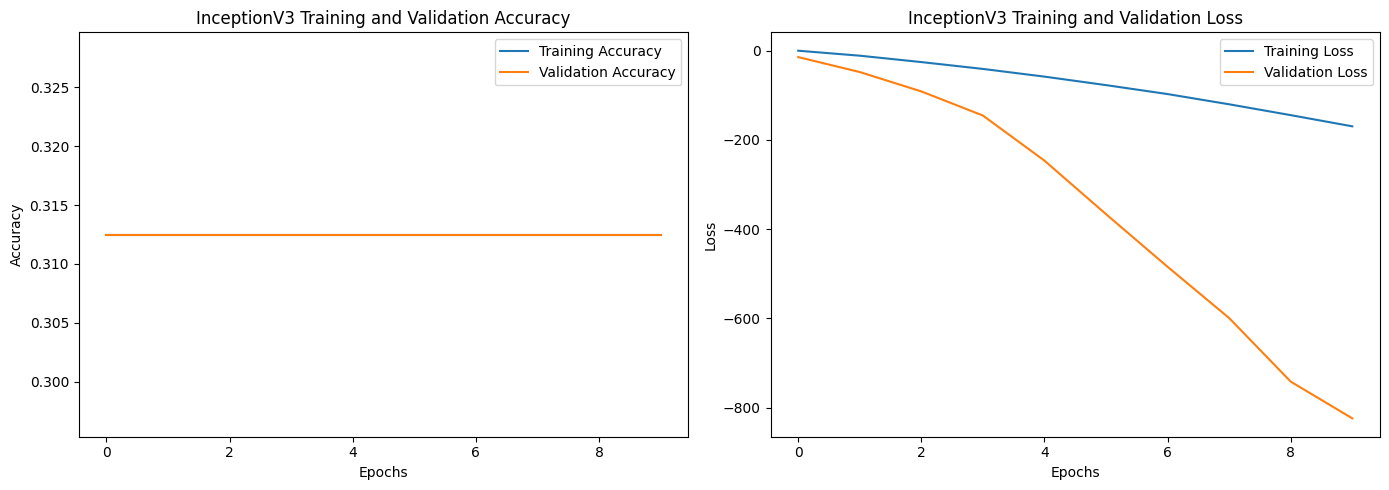

1/1 [==============================] - 9s 9s/step
              precision    recall  f1-score   support

           1       0.31      1.00      0.48         5
           2       0.00      0.00      0.00        11

    accuracy                           0.31        16
   macro avg       0.16      0.50      0.24        16
weighted avg       0.10      0.31      0.15        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

           1       0.31      1.00      0.48         5
           2       0.00      0.00      0.00        11

    accuracy                           0.31        16
   macro avg       0.16      0.50      0.24        16
weighted avg       0.10      0.31      0.15        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 3s 3s/step
              precision    recall  f1-score   support

           1       0.31      1.00      0.48         5
           2       0.00      0.00      0.00        11

    accuracy                           0.31        16
   macro avg       0.16      0.50      0.24        16
weighted avg       0.10      0.31      0.15        16

VGG16 Metrics:  (0.3125, 0.3125, 1.0, 0.47619047619047616)
ResNet50 Metrics:  (0.3125, 0.3125, 1.0, 0.47619047619047616)
InceptionV3 Metrics:  (0.3125, 0.3125, 1.0, 0.47619047619047616)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:

def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

def compile_and_train(model, train_generator, val_generator, epochs=10):
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
    return history

def evaluate_model(model, test_generator):
    test_generator.reset()
    predictions = model.predict(test_generator, verbose=1)
    y_pred = np.where(predictions > 0.5, 1, 0).flatten()
    y_true = test_generator.classes
    print(classification_report(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Load pre-trained models and fine-tune them
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = build_model(vgg_base)
vgg_history = compile_and_train(vgg_model, train_generator, val_generator)
plot_history(vgg_history, 'VGG16')

resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model = build_model(resnet_base)
resnet_history = compile_and_train(resnet_model, train_generator, val_generator)
plot_history(resnet_history, 'ResNet50')

inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inception_model = build_model(inception_base)
inception_history = compile_and_train(inception_model, train_generator, val_generator)
plot_history(inception_history, 'InceptionV3')

# Evaluate the models
vgg_metrics = evaluate_model(vgg_model, test_generator)
resnet_metrics = evaluate_model(resnet_model, test_generator)
inception_metrics = evaluate_model(inception_model, test_generator)

# Display the metrics for each model
print("VGG16 Metrics: ", vgg_metrics)
print("ResNet50 Metrics: ", resnet_metrics)
print("InceptionV3 Metrics: ", inception_metrics)
